# The `analosis` package

**Author**: Natalie B. Hogg

The `analosis` (`analysis` + `los`) package allows us to perform various analyses of the line-of-sight effects using `lenstronomy` while maintaining the same settings across the board. 

**Warning**: in reality this means many parameter choices are hard-coded inside `analosis`. 

This notebook provides the interface with the `analosis` package, allowing you to choose what type of lensing scenario to analyse and to save the results to your machine.

In [1]:
# set the path to analosis relative to this notebook
import sys
sys.path.append('../..')

# import the Run class which allows you to run the analysis of your choice
from analosis.run import Run

### Cosmology
Choose the cosmological parameters which will be used by `lenstronomy`, `astropy` and `colossus` (for halo mass functions). The `id` must match one of those known to `colossus`: https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#standard-cosmologies.

### Scenario
Choose the scenario you want to analyse.

Options:
* `composite lens`
* `distributed haloes`

### Complexity
Set the model complexity: you can choose to fit the generated image with a perfect model, a perfect minimal model, or a variety of incomplete minimal models. **This choice is only relevant for the composite lens**. It will be ignored if you run the distributed haloes scenario.

Options:
* `perfect`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS`
* `perfect minimal`: fits the generated image with a model consisting of `main lens` + `halo`+ `LOS MINIMAL`
* `power law`: fits the generated image with a model consisting of `main lens`=`EPL` +  `LOS MINIMAL`
* `missing offset`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo centre fixed to zero
* `missing halo ellipticity`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo ellipticity fixed to zero
* `missing foreground shear`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with gamma_od fixed to zero

### Number of runs
Choose the number of runs you want to do i.e. how many images will be created and fit.

### Parameters
Other parameters.

In [2]:
cosmology = {'id': 'planck18', 'H0': 67.4, 'Om': 0.315}

settings = {'scenario': 'composite lens',
            'complexity': 'perfect minimal',
            'lens_light': False,
            'number_of_images': 30,
            'MCMC': True,
            'job_name': 'baseline_minimal_no_ll',
            'n_burn': 1000,
            'n_run': 2000}

parameters = {'maximum_shear': 0.03,
              'Einstein_radius_min': 0.7, # arcsec
              'maximum_source_offset_factor': 1,
              'sigma_halo_offset': 300} # pc

### Run
Finally, run the analysis. Note that you don't need to specify a path where you want your results to be saved: `analosis` automatically saves everything to a dedicated results directory. **Please don't push the contents of this directory to github!** (There is a .gitignore in place to prevent this, so you shouldn't have to worry about doing it accidentally).

In [3]:
result = Run(cosmology, settings, parameters)

Running the composite lens case with the following settings:

Model: perfect minimal
Number of images: 30
Lens light: False
Starting MCMC


100%|██████████| 3000/3000 [37:19<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2240.0761411190033 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [38:13<00:00,  1.31it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2293.5079588890076 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:46<00:00,  1.32it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2266.6463549137115 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [38:02<00:00,  1.31it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2283.3108060359955 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:38<00:00,  1.33it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2259.422345161438 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:33<00:00,  1.33it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2254.1546697616577 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:24<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2245.352672100067 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:25<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2246.066785097122 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:54<00:00,  1.32it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2274.944710969925 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:26<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2247.2342052459717 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:57<00:00,  1.32it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2277.676428079605 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:47<00:00,  1.32it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2268.036135196686 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:11<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2231.8124330043793 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:17<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2237.6446549892426 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:38<00:00,  1.33it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2259.418074131012 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:35<00:00,  1.33it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2255.505865097046 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:19<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2240.2671728134155 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:15<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2236.21488571167 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:52<00:00,  1.32it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2273.0306758880615 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:06<00:00,  1.35it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2227.2640759944916 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:27<00:00,  1.33it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2247.975588083267 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:49<00:00,  1.32it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2270.0895161628723 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:49<00:00,  1.32it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2269.8205411434174 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:21<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2241.977737903595 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:21<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2241.5693378448486 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:52<00:00,  1.32it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2272.5695748329163 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:24<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2244.948767900467 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:04<00:00,  1.35it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2224.531893968582 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [38:49<00:00,  1.29it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2330.442169904709 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 3000/3000 [37:23<00:00,  1.34it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1000
Sampling iterations (in current run): 3000
2243.9459919929504 time taken for MCMC sampling
the number of walkers in this chain is 220

Analysis complete and results saved at /Users/pierrefleury/GitHub/analosis/analosis/results.


In [4]:
from analosis.analysis.plots import Plots
#path = result.pathfinder()
path = '/Users/pierrefleury/GitHub/analosis/analosis/results'
p = Plots(cosmology, path)

### Image plot

Preparing image plot...
The plotter is slow for this many images but the result looks soooo good. Patience, my young padawan!


../../analosis/analysis/plots.py:74: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image_list[n]), origin='lower', vmin=v_min, vmax=v_max, cmap=cmap, extent=[0, 1, 0, 1])


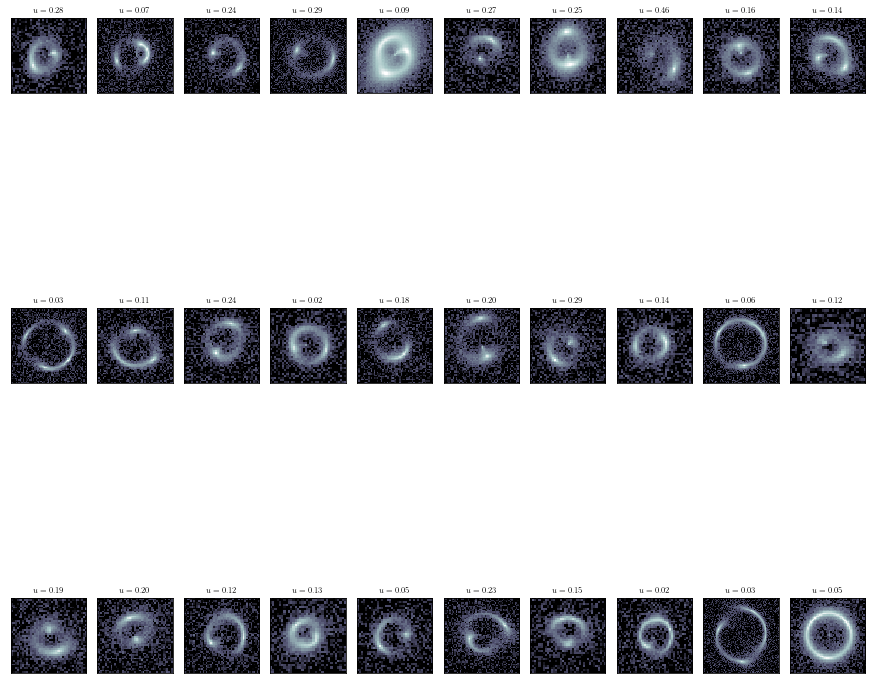

In [5]:
p.image_plot(path, settings, number_of_columns=10)

### Input vs output plot

AttributeError: 'Figure' object has no attribute 'supxlabel'

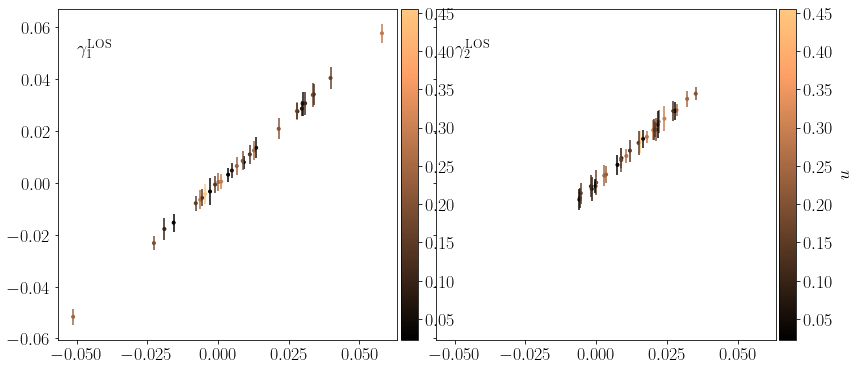

In [6]:
p.input_output_plot(path, settings, show_not_converged=True)

### Examine input kwargs

In [8]:
import pandas as pd
in_kwargs = pd.read_csv(path + '/datasets/baseline_minimal_missing_ellipticity_no_ll_input_kwargs.csv')
in_kwargs

,kappa_os,gamma1_os,gamma2_os,omega_os,kappa_od,gamma1_od,gamma2_od,omega_od,kappa_ds,gamma1_ds,...,e1_sl,e2_sl,R_sersic_ll,n_sersic_ll,e1_ll,e2_ll,x_ll,y_ll,magnitude_ll,theta_E
0,0,0.006464,0.01456,0,0,0.007358,0.003739,0,0,0.027519,...,0.111812,-0.132401,0.229551,3.720934,-0.004909,0.008327,0.0,0.0,21.129431,0.872484


In [12]:
print(in_kwargs['gamma1_los'])
print(in_kwargs['gamma2_los'])

0   -0.013698
Name: gamma1_los, dtype: float64
0    0.0082
Name: gamma2_los, dtype: float64


In [9]:
out_kwargs = pd.read_csv(path + '/datasets/baseline_minimal_missing_ellipticity_no_ll_output_kwargs.csv')
out_kwargs

,gamma1_od,gamma2_od,gamma1_los,gamma2_los,omega_los
0,-0.016158,0.007597,-0.025737,0.008427,-0.00025
